# Explaining Linear Regression with Linear Algebra
As mentioned above, in the real world one will most likely never encounter data that lies exactly on a line. Thus, we resort to finding a best-fitting line through our data points. In order to get a better picture of how we can achieve this using Linear Algebra it could be useful to reduce the problem to its simplest form. Let's consider finding the best-fitting line through 3 non-colinear points, as described in the code below:


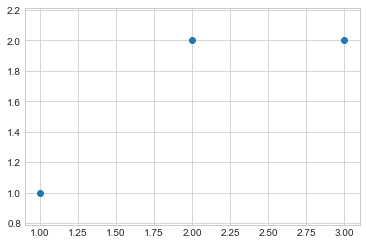

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.axis("equal")
x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

plt.scatter(x, y)
plt.show()

In the figure above we are plotting the following points: $\large\{(1,1), (2,2), (3,2)\}$. Let's imagine that we are trying to define a line $y = c + ax$ that magically goes through all three points. We would define the following relations:


$$\large\begin{cases} c + 1a = 1 \\ c + 2a = 2 \\ c + 3a = 2 \end{cases}$$

We can rewrite this system of equations as the following matrix equation:

$$\large\textbf{Ax} = \textbf{b}  \Leftrightarrow \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix} 
\begin{bmatrix} c \\ a \end{bmatrix} = 
\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

It is obvious from the standpoint of both Linear Algebra and Geometry that this is an unsolvable equation. Generally, equations of the form $\textbf{Ax} = \textbf{b}$ are solvable when $\textbf{b}$ is in the column space of $\textbf{A}$. Looking once again at the example above we see that it is not the case, especially when we write it down as follows:

$$
\large
c\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} + d \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

Since this is unsolvable we would still want to see the best solution possible, that is, solve:
$$\large A \hat{x} = p$$
,where $\textbf{p}$ is a vector very close to $\textbf{b}$ as possible that is present in the column space of out matrix $\textbf{A}$ , that is, it can be written as a linear combination of columns of $\textbf{A}$. Notice that this time we replace $\textbf{x}$ by $\hat{x}$. This is in order to emphasise that, in fact, $\textbf{x}$ does not exist as a solution to the initial equation.

Let's go back now to the original equation 
$$\large Ax = b$$.
Notice that if $A$ were a square $n \times n$ invertible matrix, our job would be fairly straigh-forward:

$$
\begin{align}
\large Ax \large =&  \large b \\
\large A^{-1}Ax \large =& \large A^{-1}b \vert \cdot A^{-1} \\
\large x =& \large A^{-1}b
\end{align}
$$

However, most of the time, in real world situations, the matrix will have more rows than columns. This means that we must find some means to obtain an invertible square matrix on the left side:

$$
\begin{align}
\large A \hat{x} =& \large b \\
\large A^{T}A \hat{x} =& \large A^{T} b\\
\end{align}
$$

Voila! we know that $A^{T}A$ is invertible because it is square and we know that the initial matrix $A$ has full rank (all of its columns are linearly independent and therefore, all of its columns are pivot columns). We know from the rules of matrix multiplication that $A^{T}A$ will always produce an $n \times n$ matrix, where $n$ is the number of columns of $A$. We can now multiply both sides by $(A^{T} A)^{-1}$:
$$
\begin{align}
\large (A^{T} A)^{-1}A^{T}A \hat{x} =& \large (A^{T} A)^{-1} A^{T} b \\
\large \hat{x} =& \large (A^{T} A)^{-1} A^{T} b \\
\end{align}
$$

So we have obtained the best solution $\hat{x}$. Note that $\hat{x}$ contains the "weights" or the coeficients $c$ and $d$ of our best-fitting line. We can define a simple python function to do all the calculations for us:

In [44]:
def linearRegression(X, Y):
    weights = np.matmul(
                np.matmul(
                    np.linalg.inv(
                        np.matmul(
                            X.transpose(),
                            X)),
                    X.transpose()),
                Y)
    return weights

n = x.shape[0]
X = np.append(np.ones(n).reshape([n, 1]), x.reshape([n, 1]), axis=1)
y = y.reshape(n, 1)
wghts = linearRegression(X, y)
print(wghts)

[[0.66666667]
 [0.5       ]]


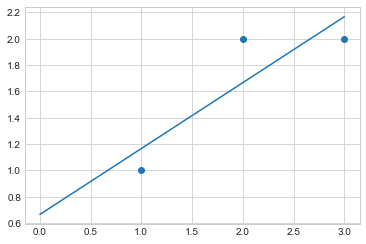

In [45]:
x1 = np.linspace(0, 3, 100)
y1 = wghts[0] + wghts[1] * x1

plt.scatter(x, y)
plt.plot(x1, y1)
#plt.axis([-5, 5, 0, 3])
plt.show()

This method is extendable to n dimensions. This means that we can have reasonably many "weights" to predict as long as we have more data points than variables to predict. The reason for this will be explained later. Let us explore the concept of Linear Regression extended to the 3-dimensional space. Now, instead of looking for a best-fitting line we are trying to produce a best-fitting plane through several points. It is harder to imagine this in higher-dimensional, but it is reasonable to state that we are dealing with some n-dimensional surface.

Let us generate some mock-up data on which we will apply our model:

In [46]:
X = np.random.uniform(0, 10, [100, 2])
row, col = X.shape
e = np.random.uniform(-5, 5, row)
Y = X[:, 0] * 2 + X[:, 1] + e

import pandas as pd
print(pd.DataFrame(np.append(X, Y.reshape([row, 1]), axis=1)))

           0         1          2
0   1.033760  0.079197  -0.962168
1   4.047597  0.826920  11.786235
2   3.570432  3.349862  11.026693
3   0.848752  9.762994   6.478532
4   3.232490  5.796531  14.900208
..       ...       ...        ...
95  1.121126  2.653076   4.541510
96  5.191982  0.053338   7.496668
97  2.253227  1.637315   2.760253
98  5.963174  3.958846  13.870933
99  7.619992  7.424315  20.981633

[100 rows x 3 columns]


<code>X</code> is a $100 \times 2$ matrix with values generated randomly between $0$ and $10$ from an uniform distribution. The <code>e</code> variable will serve as the "noise" added to each data point such that it does not perfectly lie on a plane.

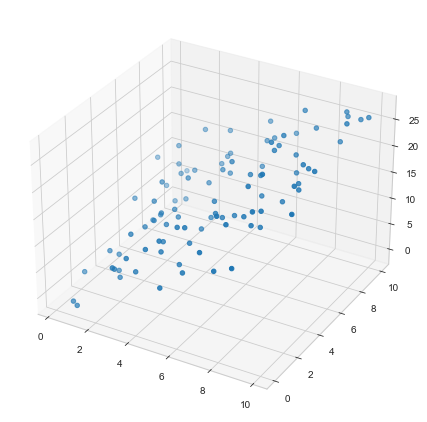

In [47]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

Next, we need to add a column of ones to our <code>X</code> matrix in order to account for the free term. Then, we apply the previously-defined model which will return the weights and then use this to plot the best-fitting plane.

In [48]:
X = np.append(np.ones(row).reshape([row, 1]), X, axis=1)
wghts = linearRegression(X, Y) 
print(wghts)

[0.39551521 1.87874942 0.93518602]


The results are somewhat to be expected, when we look back at the function that we have defined initially: <code> Y = X[:, 0] * 2 + X[:, 1] + e </code>. The weights that we have obtained after applying the Linear Regression model are in the vicinity of the coeficients in our original function.

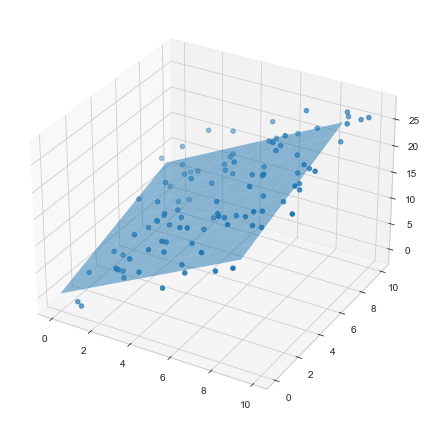

In [49]:
x, y = np.meshgrid(range(10), range(10))
z = wghts[0] + wghts[1] * x + wghts[2] * y

fig = plt.figure()
fig.set_size_inches(12.5, 7.5)

ax = plt.axes(projection="3d")
ax.scatter(X[:, 1], X[:, 2], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

However, we are still limited in what kind of data frame we can use, and namely:
<ul>
    <li>It has to be taller than wider(has to have more rows than columns);</li>
    <li>Has to be non-singular(all of its columns must be linearly independent);</li>
</ul>

## Linear Regression via Gradient Descent

Let's look at what happens if two columns in the matrix are linearily dependent. We once again generate some mock-up data to get a visual idea of what happens:

In [50]:
X = np.random.uniform(0, 10, (64, 1))
X = np.concatenate((X, X * 2), axis=1)
rows = X.shape[0]
Y = X[:, 0] * 2 + X[:, 1]
Y = Y.reshape((Y.shape[0], 1))

The code snippet <code>X = np.concatenate((X, X * 2), axis=1)</code> produces a matrix <code>X</code> with two linearily dependent columns, because <b>column two</b> is <b>column one</b> multiplied by $2$. Let's graph our mock-up data points:

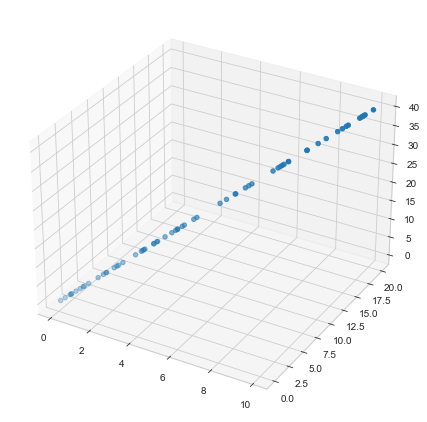

In [51]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

We notice that the dimensionality of our data has been reduced. In this particular case, it is intuitive that the Linear Algebra method fails, because one can imagine an infinity of planes that go through these points. Therefore, it becomes intuitive that Linear Algebra is not enough to produce a result, because the output $\hat{x}$ is just a single vector. This is where, the model of <b>Gradient Descent</b> comes into action:

First, we produce a <b>cost function</b>, which will quantify how well or how badly our 2D line, 3D- or higher-dimensional plane approximates our data points. Our cost function is the following:

$$\Large f(w) = (Xw-y)^T (Xw-y)$$,

where $w$ is the same as $\hat{x}$ i.e. the vector of weights that we use to approximate our datapoints with. This is the same as writing:

$$\Large f = \sum_{k=0}^{n} (\hat{y_k} - y_k)^2$$

We are basically subtracting our prediction at each point by the corresponding value in the dataset, then square it and finally take the sum of all these squares. This is the function we need to minimize. We can achieve that by taking the gradient of $f$ and trying to find some values in $w$ for which it will be as small as possible.

Because all the computations are out of the scope of this study, we will simply write this formula down:

$$\Large \nabla f = 2X^T(Xw - y)$$

We use the following iterative algorithm to compute our vector $w$:
![Random Unsplash Image](https://miro.medium.com/max/700/1*MdsoOAIddbg2TEUdPNKuhw.png)

In [52]:
import numpy as np
import math

In [53]:
class LinearRegression():   
    def __init__(self):
        self.params__ = None

    def gradientDescent(self, X, y, learning_rate=0.00001, iterations=500, batch_size=16):
        X = np.concatenate([X, np.ones_like(y)], axis = 1)
        rows, cols = X.shape    
        X = np.append(X, y, axis=1)
        w = np.random.random((cols, 1))

        for i in range(iterations):
            np.random.shuffle(X)
            y_it = X[:, -1].reshape((rows, 1))
            X_it = X[:, :-1]

            for batch in range(math.ceil(rows / batch_size)):
                batch_start = batch * batch_size

                x_batch = X_it[batch_start : min(batch_start + batch_size, X.shape[0])]
                y_batch = y_it[batch_start : min(batch_start + batch_size, X.shape[0])]
                w -= learning_rate * 2 * np.matmul(x_batch.transpose(), (np.matmul(x_batch, w) - y_batch))
        
        self.params__= w
        return self
        
    def predict(self, X):
        X = np.concatenate([X, np.ones(X.shape[0]).reshape((X.shape[0], 1))], axis=1)
        return np.matmul(X, self.params__)

Now that we have our model set up, let's test it on our previous mock-up data:

In [54]:
model = LinearRegression().gradientDescent(X, Y, learning_rate=0.0001, iterations=500, batch_size=16)
model.params__

array([[1.04003711],
       [1.47077186],
       [0.11788474]])

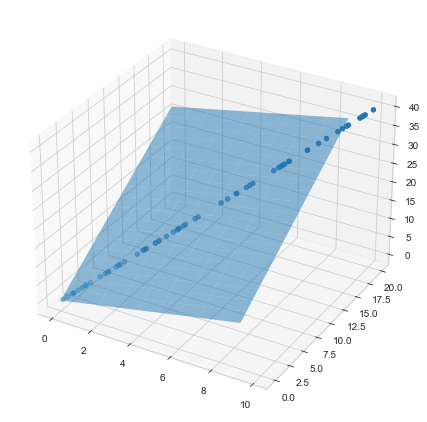

In [55]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
wghts = model.params__
x, y = np.meshgrid(range(10), range(20))
z = wghts[-1] + wghts[0] * x + wghts[1] * y

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

In [56]:
X = np.random.uniform(0, 10, [64, 2])
row, col = X.shape
e = np.random.uniform(-5, 5, row)
Y = X[:, 0] * 2 + X[:, 1] + e
Y = Y.reshape((Y.shape[0], 1))

In [57]:
model = LinearRegression().gradientDescent(X, Y, learning_rate=0.0001, iterations=500, batch_size=16)
model.params__

array([[2.02142105],
       [0.79868744],
       [0.53655133]])

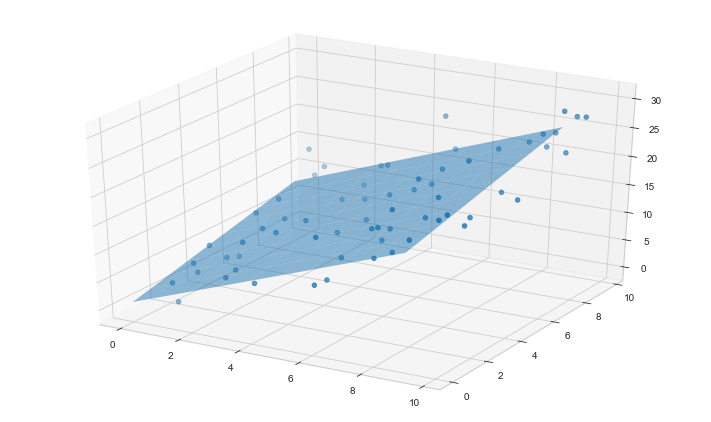

In [11]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
wghts = model.params__
x, y = np.meshgrid(range(10), range(10))
z = wghts[-1] + wghts[0] * x + wghts[1] * y

ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()

**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Lung cancer mortality regresion implementation data from cancer.gov

In [146]:
# Importing libraries
import pandas as pd

# Read csv file into a pandas dataframe
df = pd.read_csv('death_.csv')

# Take a look at the first few rows
print (df.head())

                        County   FIPS Met Objective of 45.5? (1)  \
0                United States      0                         No   
1       Perry County, Kentucky  21193                         No   
2      Powell County, Kentucky  21197                         No   
3  North Slope Borough, Alaska   2185                         No   
4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0                                         46.1               157376.00  

We can also answer, what are the expected types?

* Country: string
* FIPS: int
* Met Objective of 45.5? (1): string
* Age-Adjusted Death Rate: int
* Lower 95% Confidence Interval for Death Rate: float or int
* Upper 95% Confidence Interval for Death Rate: float or int
* Average Deaths per Year: float or int
* Recent Trend (2): string
* Recent 5-Year Trend (2) in Death Rates: float or int
* Lower 95% Confidence Interval for Trend: float or int
* Upper 95% Confidence Interval for Trend: float or int

In [147]:
# Importing libraries
import pandas as pd
# Making a list of missing value types
missing_values = ["**", "*"]
df = pd.read_csv("death_.csv", na_values = missing_values)
# Looking for all missing values
print (df.isnull().sum())

County                                            0
FIPS                                              0
Met Objective of 45.5? (1)                      328
Age-Adjusted Death Rate                         328
Lower 95% Confidence Interval for Death Rate    328
Upper 95% Confidence Interval for Death Rate    328
Average Deaths per Year                         328
Recent Trend (2)                                447
Recent 5-Year Trend (2) in Death Rates          447
Lower 95% Confidence Interval for Trend         447
Upper 95% Confidence Interval for Trend         447
dtype: int64


In [148]:
print("Contents of the Dataframe : ")
print(df)
# Drop rows which contain any NaN values
mod_df = df.dropna(inplace=True)
print("Modified Dataframe : ")
print(mod_df);

Contents of the Dataframe : 
                                            County   FIPS  \
0                                    United States      0   
1                           Perry County, Kentucky  21193   
2                          Powell County, Kentucky  21197   
3                      North Slope Borough, Alaska   2185   
4                          Owsley County, Kentucky  21189   
...                                            ...    ...   
3136  Yakutat City and Borough, Alaska<sup>3</sup>   2282   
3137             Yukon-Koyukuk Census Area, Alaska   2290   
3138                          Zapata County, Texas  48505   
3139                          Zavala County, Texas  48507   
3140                  Ziebach County, South Dakota  46137   

     Met Objective of 45.5? (1)  Age-Adjusted Death Rate  \
0                            No                     46.0   
1                            No                    125.6   
2                            No                    125.3  

In [149]:
df.to_csv (r'cancer_modified.csv', index = False, header=True)

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
cancer = pd.read_csv('cancer_modified.csv')

In [166]:
cancer.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46.0,45.9,46.1,157376,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0.0,3.4
3,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
4,"Union County, Florida",12125,No,113.5,89.9,141.4,19,falling,-2.2,-4.3,0.0


FIPS = The first 2 digits are the 2-digit FIPS state code. The third, fourth, and fifth are the 3-digit FIPS county code.

**Data analysis after cleaning the set date**

In [167]:
import seaborn as sns

In [168]:
y= cancer['Age-Adjusted Death Rate' ]
x= cancer['Average Deaths per Year']

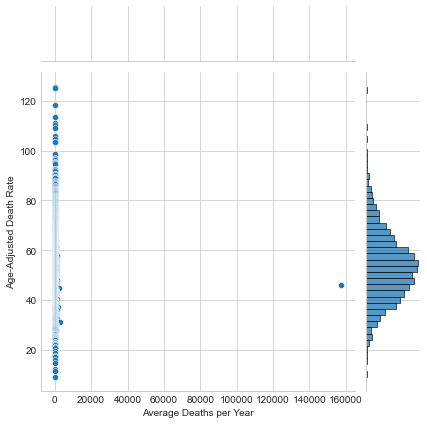

In [169]:
sns.jointplot(x=x, y=y)

After analyzing this graph,we notice that the death rate is higher for people aged 35-60 years, which is specific to lung cancer.

In [127]:
x= cancer['FIPS' ]
y= cancer['Average Deaths per Year']

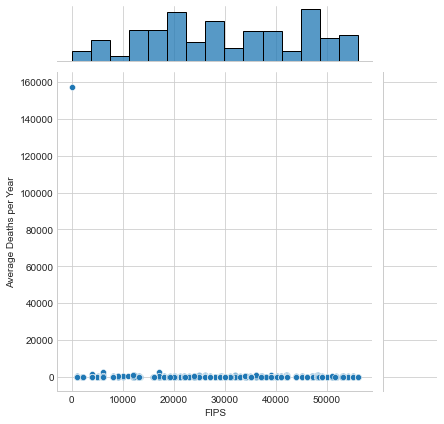

In [128]:
sns.jointplot(x=x,y=y)

Here we can notice that most countries have the number of deaths between 0 and 500, but there are also those with up to 3000 annual deaths.

In [131]:
x=cancer['Age-Adjusted Death Rate']
y=cancer['FIPS']

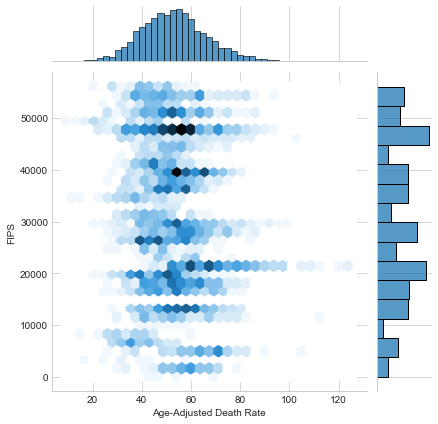

In [132]:
sns.jointplot(x=x,y=y,kind='hex')

Also, I used joinplot to create a hexagonal graph so it would be easier to analyze age-adjusted death rate compared to the country people were born in.

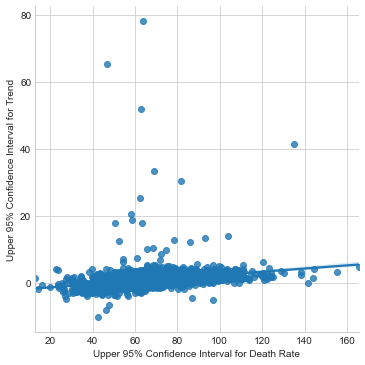

In [133]:
sns.lmplot(x='Upper 95% Confidence Interval for Death Rate',y ='Upper 95% Confidence Interval for Trend', data=cancer)


Above we created the linear graph model (using seaborn's lmplot) that compares the Confidence Interval for Death Rate and the Trend. We can notice that they are closely related and are being constant, which allows us to predict whether the number of people dying from this type of cancer will increase or not.

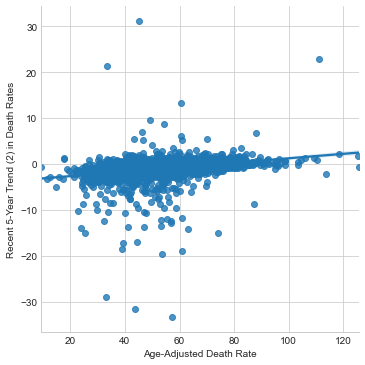

In [134]:
sns.lmplot(x='Age-Adjusted Death Rate',y ='Recent 5-Year Trend (2) in Death Rates', data=cancer)

This date set contains information for the years 2013-2018. We notice that most countries have about the same number of deaths each year, few of which have increased or decreased significantly. Also, thanks to this analysis, we can see in which of the countries medicine has evolved, the healthy lifestyle has increased or vice versa. We can also see that lung cancer has more deaths among people aged 30-70, but that is beginning to decline due to the factors listed above.

In [135]:
y = cancer["Average Deaths per Year"]

In [136]:
X = cancer[['Age-Adjusted Death Rate', 'FIPS','Recent 5-Year Trend (2) in Death Rates','Upper 95% Confidence Interval for Death Rate']]

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lm = LinearRegression()

In [141]:
lm.fit(X_train,y_train)

LinearRegression()

In [142]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 2.78425325e+01 -1.24310880e-02 -1.28609245e+01 -2.73773197e+01]


***Predicting Test Data***

In [143]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

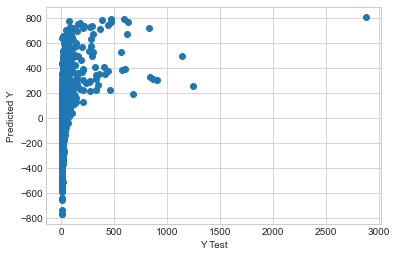

In [144]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [145]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Age-Adjusted Death Rate,27.842532
FIPS,-0.012431
Recent 5-Year Trend (2) in Death Rates,-12.860925
Upper 95% Confidence Interval for Death Rate,-27.377320


To evaluate the prediction of these data we used the mortality trend in 2013-2018, the age-adjusted death rate, the average number of people who died each year per country and the mortality rate range, thus reaching the following conclusions:


*   We can notice that the rate of people dying from lung cancer is decreasing and the age is increasing.
*   The trend of people dying from this disease is declining, which is very good and shows us that people have begun to lead a healthier lifestyle and could even be due to the evolution of hospitals and the development of countries.
*   The age of people who die is increasing, which shows us that young people are more aware of their lives, they do not smoke and are taking care of their health.

**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

# App vs Website regresion implementation data from data.world

#### Linear regression is commonly used for predictive analysis and modeling. For example, it can be used in a lot of fields from medical analys and health care to bussines and enviroiment analys. In the project we used Linear Regresion in medical field and in enviroiment data analys.Now we will use a example from bussines analys.

#### On this part of the project we will use the data set of a company colected from their app and website to see which is the most used platform of that company.

*Imports used in our project*


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Reading the costumers data which registred on the app or on the website.


In [9]:
customers = pd.read_csv('Customers')

In [10]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### Data-analys of the dataset using more complexe graphs implemented in python.

In [13]:
import seaborn as sns

In [14]:
x= customers['Time on Website' ]
y= customers['Yearly Amount Spent']

#### Now we will use the sns.jointplot from "seaborn" library to plot a informative graph of Yearly Amount Spent x Time on Website.

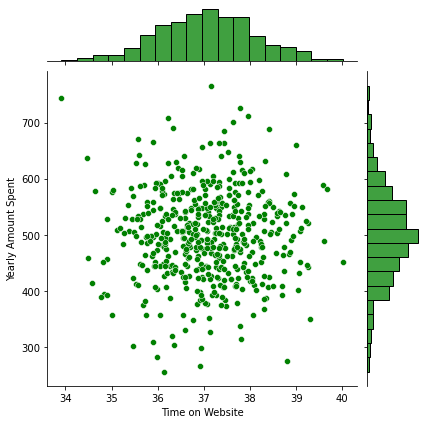

In [21]:
sns.jointplot(x=x, y=y ,color="green")

In [22]:
x=customers['Time on App']
y=customers['Yearly Amount Spent']

#### Now we will do the same for the second platform "app" to make a visual comparision of the given data.

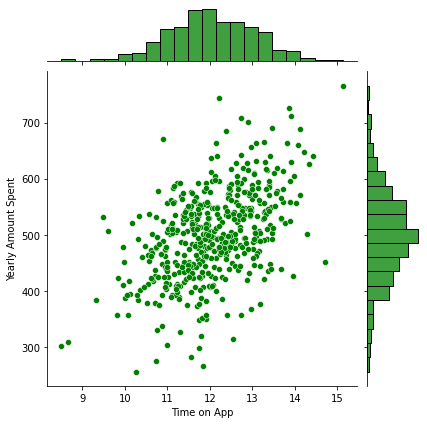

In [23]:
sns.jointplot(x=x,y=y, color="green")

###  On this step we are using "sns.jointplot king='hex'" to campare easier the data. On the field where are more points the hexagons are of a more intensive color.

#### For the website

In [24]:
x=customers['Time on Website']
y=customers['Yearly Amount Spent']

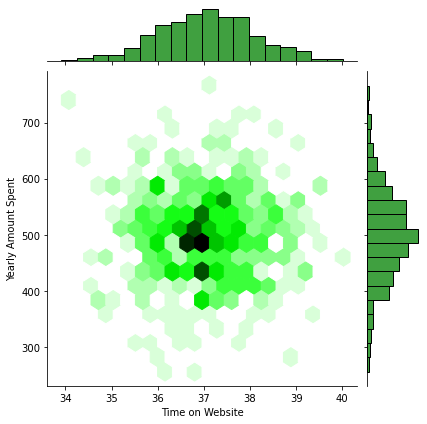

In [25]:
sns.jointplot(x=x,y=y,kind='hex',color="green")

#### For the app

In [26]:
x=customers['Time on App']
y=customers['Yearly Amount Spent']#### For the website

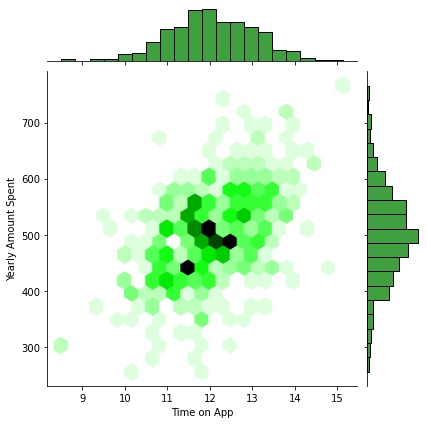

In [27]:
sns.jointplot(x=x,y=y,kind='hex',color="green")

####  Next step is to plot a pair graph using sns.pairplot to plot all the given data from the dataset to have a visual interpretation of it.


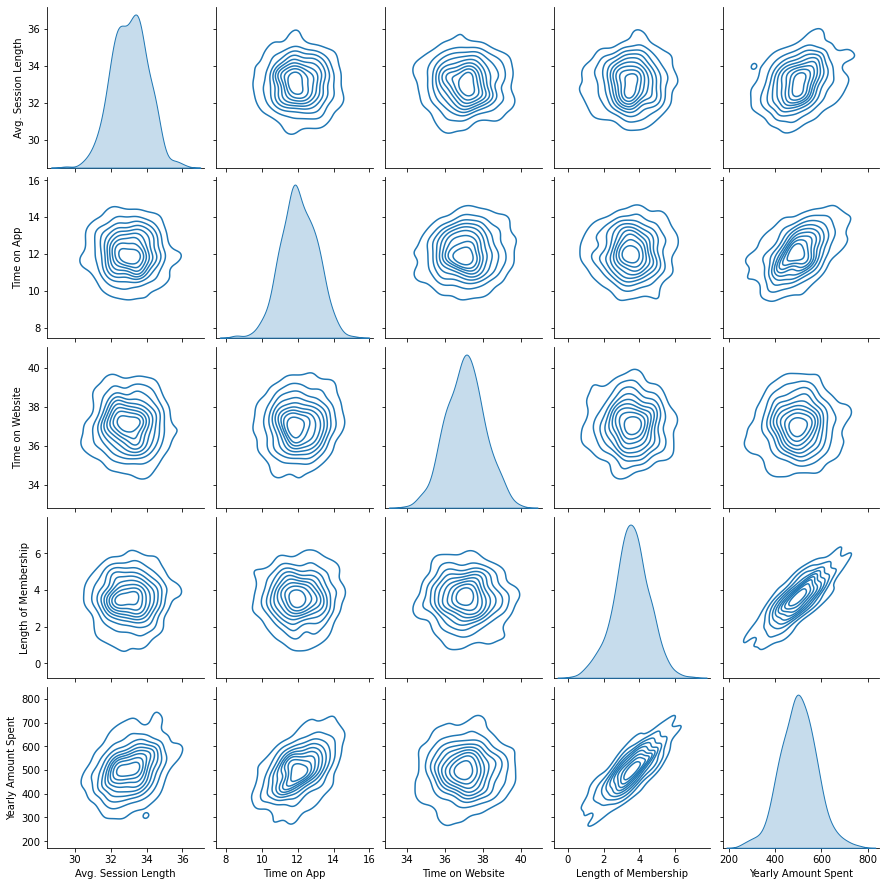

In [36]:
sns.pairplot(customers,kind="kde")

#### Creating the liniar model of the data to compare the Yearly Amount Spent vs Length of Membership using seaborn's lmplot.


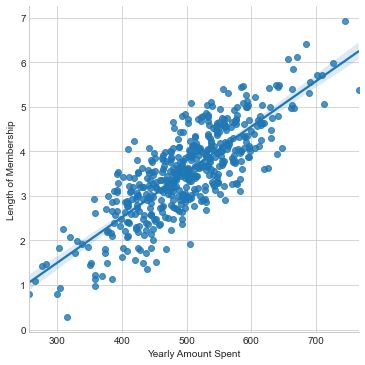

In [60]:
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=customers)

####  Training and  testing the data. We will split the data in trained and testing set.

In [45]:
y = customers['Yearly Amount Spent']

In [46]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

#### Now we use the model_selection.train_test_spli from sklearn library to split the data in trained and tested. Set test_size=0.3 and random_state=101


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

#### Create the regresion LinearRegression() named lm

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

#### Print the coefficients used in the model

In [49]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


####  Predict the test data.
Use lm.predict() to predict off the X_test set of the data.

In [50]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

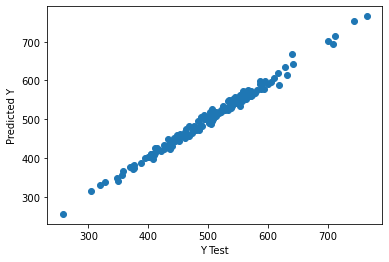

In [51]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

####  Evaluating the Model
Evaluating the errors that could apear in this model

In [52]:
from sklearn import metrics

print('Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Absolute Error: 7.22814865343083
Squared Error: 79.81305165097461
Root Mean Squared Error: 8.933815066978642


In [53]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Afterr all the comparations we got the response that the company should focuse more on the app becouse while comparation the app is more productive. Also the company should improve the site to have a better numbers on the website platform.
Using the jupyter notebook we made the dataset and the comparision visualisation to have a proper research done.

####  The winer of the contest App vs WebSite is *Mobile App*


**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Predicting Life Expectancy

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
def min_max_scaling(df):  # Normalization using min-max approach (xnorm = (x-xmin)/(xmax-xmin))

    df_norm = df.copy()  # copy the dataframe
    for column in df_norm.columns:  # apply min-max scaling
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

    return df_norm


def correlation(dataset, threshold):                # Finding a correlation between the columns and leaving...
                                                    # ...only those with correlation higher than the given threshold
    col_corr = set()                                # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] <= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]    # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]            # deleting the column from the dataset


def clean_df(df, rqcol):
    df = df.dropna()
    df = df[(df != '*').all(axis=1)]                   # list of forbidden characters
    df = df[(df != '**').all(axis=1)]
    df = df.replace(',', '.', regex=True)              # converting numbers identified as string to float
    df = df.astype(float)

    df = min_max_scaling(df)

    cols = [df.columns[rqcol]] + [col for col in df if col != df.columns[rqcol]]  # Setting the required column
    df = df[cols]                                                                 # to apply linear regression on
                                                                                  # as first column in dataset
    correlation(df, -0.75)

    x = df.drop(df.columns[0], axis=1).values          # Code to test the r2_score on the clean dataset
    y = df[df.columns[0]].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
#     print(df)
    print(r2_score(y_test, y_pred))
    df.to_csv (r'export_dataframe2.csv', index = False, header=True)

In [9]:
df1 = pd.read_csv('death_.csv', decimal=',')
to_drop = ['County', 'FIPS', 'Met Objective of 45.5? (1)', 'Recent Trend (2)']
df1.drop(columns=to_drop, inplace=True)
clean_df(df1, 0)

df2 = pd.read_csv('Life_Expectancy_Data.csv', decimal=',')
to_drop = ['Country', 'Status']
df2.drop(columns=to_drop, inplace=True)
clean_df(df2, 1)

0.9994846763884515


C:\Users\razva\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0.8418946082340679


In [7]:
dff = pd.read_csv("export_dataframe2.csv")
dff

,Life expectancy,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.466667,1.000000,0.362881,0.038750,0.000000,0.003759,0.649485,0.008780,0.227696,0.039524,0.031250,0.543590,0.649485,0.000000,0.004889,0.026074,0.630996,0.612100,0.511752,0.357576
1,0.353333,0.933333,0.373961,0.040000,0.000000,0.003878,0.618557,0.003743,0.221039,0.040952,0.572917,0.545055,0.618557,0.000000,0.005127,0.000253,0.642066,0.619217,0.508547,0.351515
2,0.353333,0.866667,0.369806,0.041250,0.000000,0.003861,0.639175,0.003271,0.214381,0.042381,0.614583,0.541392,0.639175,0.000000,0.005287,0.024525,0.649446,0.626335,0.502137,0.345455
3,0.344444,0.800000,0.375346,0.043125,0.000000,0.004123,0.670103,0.021203,0.207723,0.044286,0.666667,0.569963,0.670103,0.000000,0.005608,0.002857,0.656827,0.637011,0.494658,0.339394
4,0.337778,0.733333,0.379501,0.044375,0.000000,0.000374,0.680412,0.022923,0.202397,0.046190,0.677083,0.522344,0.680412,0.000000,0.000519,0.002302,0.667897,0.644128,0.485043,0.321212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,0.006667,0.266667,1.000000,0.016875,0.243561,0.000000,0.680412,0.000236,0.334221,0.020000,0.666667,0.468132,0.649485,0.663366,0.003799,0.009875,0.343173,0.330961,0.434829,0.303030
1645,0.011111,0.200000,0.988920,0.016250,0.226764,0.000000,0.051546,0.007593,0.328895,0.019524,0.041667,0.423443,0.680412,0.724752,0.003790,0.009764,0.357934,0.348754,0.446581,0.321212
1646,0.017778,0.133333,0.099723,0.015625,0.247480,0.000000,0.731959,0.002313,0.323569,0.019048,0.729167,0.424176,0.711340,0.786139,0.000467,0.000097,0.040590,0.042705,0.456197,0.351515
1647,0.028889,0.066667,0.948753,0.015625,0.095745,0.000000,0.762887,0.004025,0.318242,0.018571,0.760417,0.397070,0.752577,0.831683,0.004589,0.009558,0.055351,0.056940,0.456197,0.339394


**The Project is in the development process so we are all still working on improving**

PBL UTM FAF203 Petru Stratulat/Liviu Mocanu/Nina Buruiana/Razvan Fiser                      

©All rights reserved